In [1]:
from google.colab import drive
# connect to Gdrive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd gdrive/MyDrive/vgg16

In [13]:
%ls

model_cnn.h5  model_fix.h5  test/  train/


## Preparation

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Membuat objek model
model = Sequential()

# Menambahkan blok-blok konvolusi
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Konversi matriks fitur menjadi vektor
model.add(Flatten())

# Menambahkan layer-layer fully connected
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [6]:
#opt = Adam(learning_rate=0.001)
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

## Train Data


In [8]:
gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2),
    validation_split=0.2
)

data_path = "train/"

train_ds=gen.flow_from_directory(
    data_path,
    class_mode='categorical',
    shuffle=True,
    batch_size=32,
    target_size=(244,244),
    subset="training"
)

validation_ds=gen.flow_from_directory(
    data_path,
    class_mode='categorical',
    shuffle=True,
    batch_size=32,
    target_size=(244,244),
    subset="validation"
)

Found 624 images belonging to 2 classes.
Found 155 images belonging to 2 classes.


In [ ]:
model.fit(
    train_ds,
    steps_per_epoch=train_ds.samples // train_ds.batch_size,
    validation_data=validation_ds,
    validation_steps=validation_ds.samples // validation_ds.batch_size,
    epochs=10,
    verbose=1)

In [10]:
model.save('model_fix.h5')

In [27]:
import os
images_list = []
images = os.listdir("test/")
for img in images:
  images_list.append(os.path.join("test/", img))

In [23]:
# Load the model
saved_model = load_model("model_fix.h5")

In [28]:
# Load Image
def load_image(image_path):
  img = Image.open(image_path)
  return img
     


In [29]:

# Image Preprocessing
def image_preprocessing(image_path):
  img = load_image(image_path)
  img = img.resize((224,224))
  
  image_array = image.img_to_array(img)
  image_array = tf.expand_dims(image_array, axis=0)
  
  return image_array
     

In [31]:
image_count = 0
fig, axs = plt.subplots(3, 1, figsize=(30, 15))

for image_path in images_list:
  test/ = image_preprocessing(image_path)

  img = load_image(image_path)
  img = np.asarray(img)

  prediction = vgg16_model.predict(image_to_predict)
  predicted_class = ""
  if prediction[0][0] > prediction[0][1] and prediction[0][0] > prediction[0][2]:
      predicted_class = "Motor"
  elif prediction[0][1] > prediction[0][0] and prediction[0][1] > prediction[0][2]:
      predicted_class = "Mobil"

  img_title = f"{prediction} => {predicted_class}"
  axs[image_count].imshow(img)
  axs[image_count].set_title(img_title)
  image_count += 1

plt.show()

SyntaxError: ignored

1/1 [==============================] - 1s 779ms/step
Prediksi: Bike
Predicted probability: 0.5107642412185669


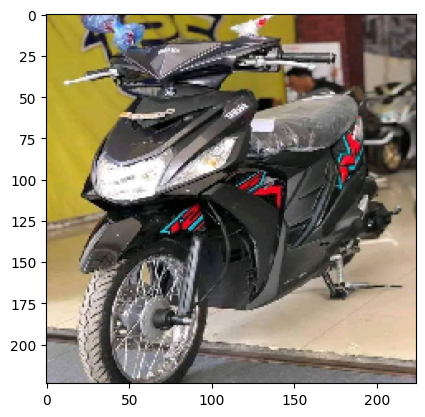

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the image
img_path = "test/Bike/bike(5).jpg"
img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img)
plt.imshow(img.astype(np.uint8))

# Preprocess the image
img = img / 255.0  # Normalize the pixel values
img = np.expand_dims(img, axis=0)  # Add the batch dimension

# Load the model
saved_model = load_model("model_fix.h5")

# Make prediction
output = saved_model.predict(img)

# Define the class labels
class_labels = ['Bike', 'Car']

# Print the predicted class
predicted_class_idx = np.argmax(output)
predicted_class = class_labels[predicted_class_idx]
print(f"Prediksi: {predicted_class}")
print(f"Predicted probability: {output[0][predicted_class_idx]}")

In [ ]:
# Preprocess the image
img = img / 255.0  # Normalize the pixel values
img = np.expand_dims(img, axis=0)  # Add the batch dimension

In [ ]:
# Make prediction
output = saved_model.predict(img)

In [ ]:
# Define the class labels
class_labels = ['motor', 'mobil']

In [ ]:

# Print the predicted class
predicted_class_idx = np.argmax(output)
predicted_class = class_labels[predicted_class_idx]
print(f"Prediksi: {predicted_class}")
print(f"Predicted probability: {output[0][predicted_class_idx]}")